In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('DataSets/ClientsSample.txt')

In [3]:
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

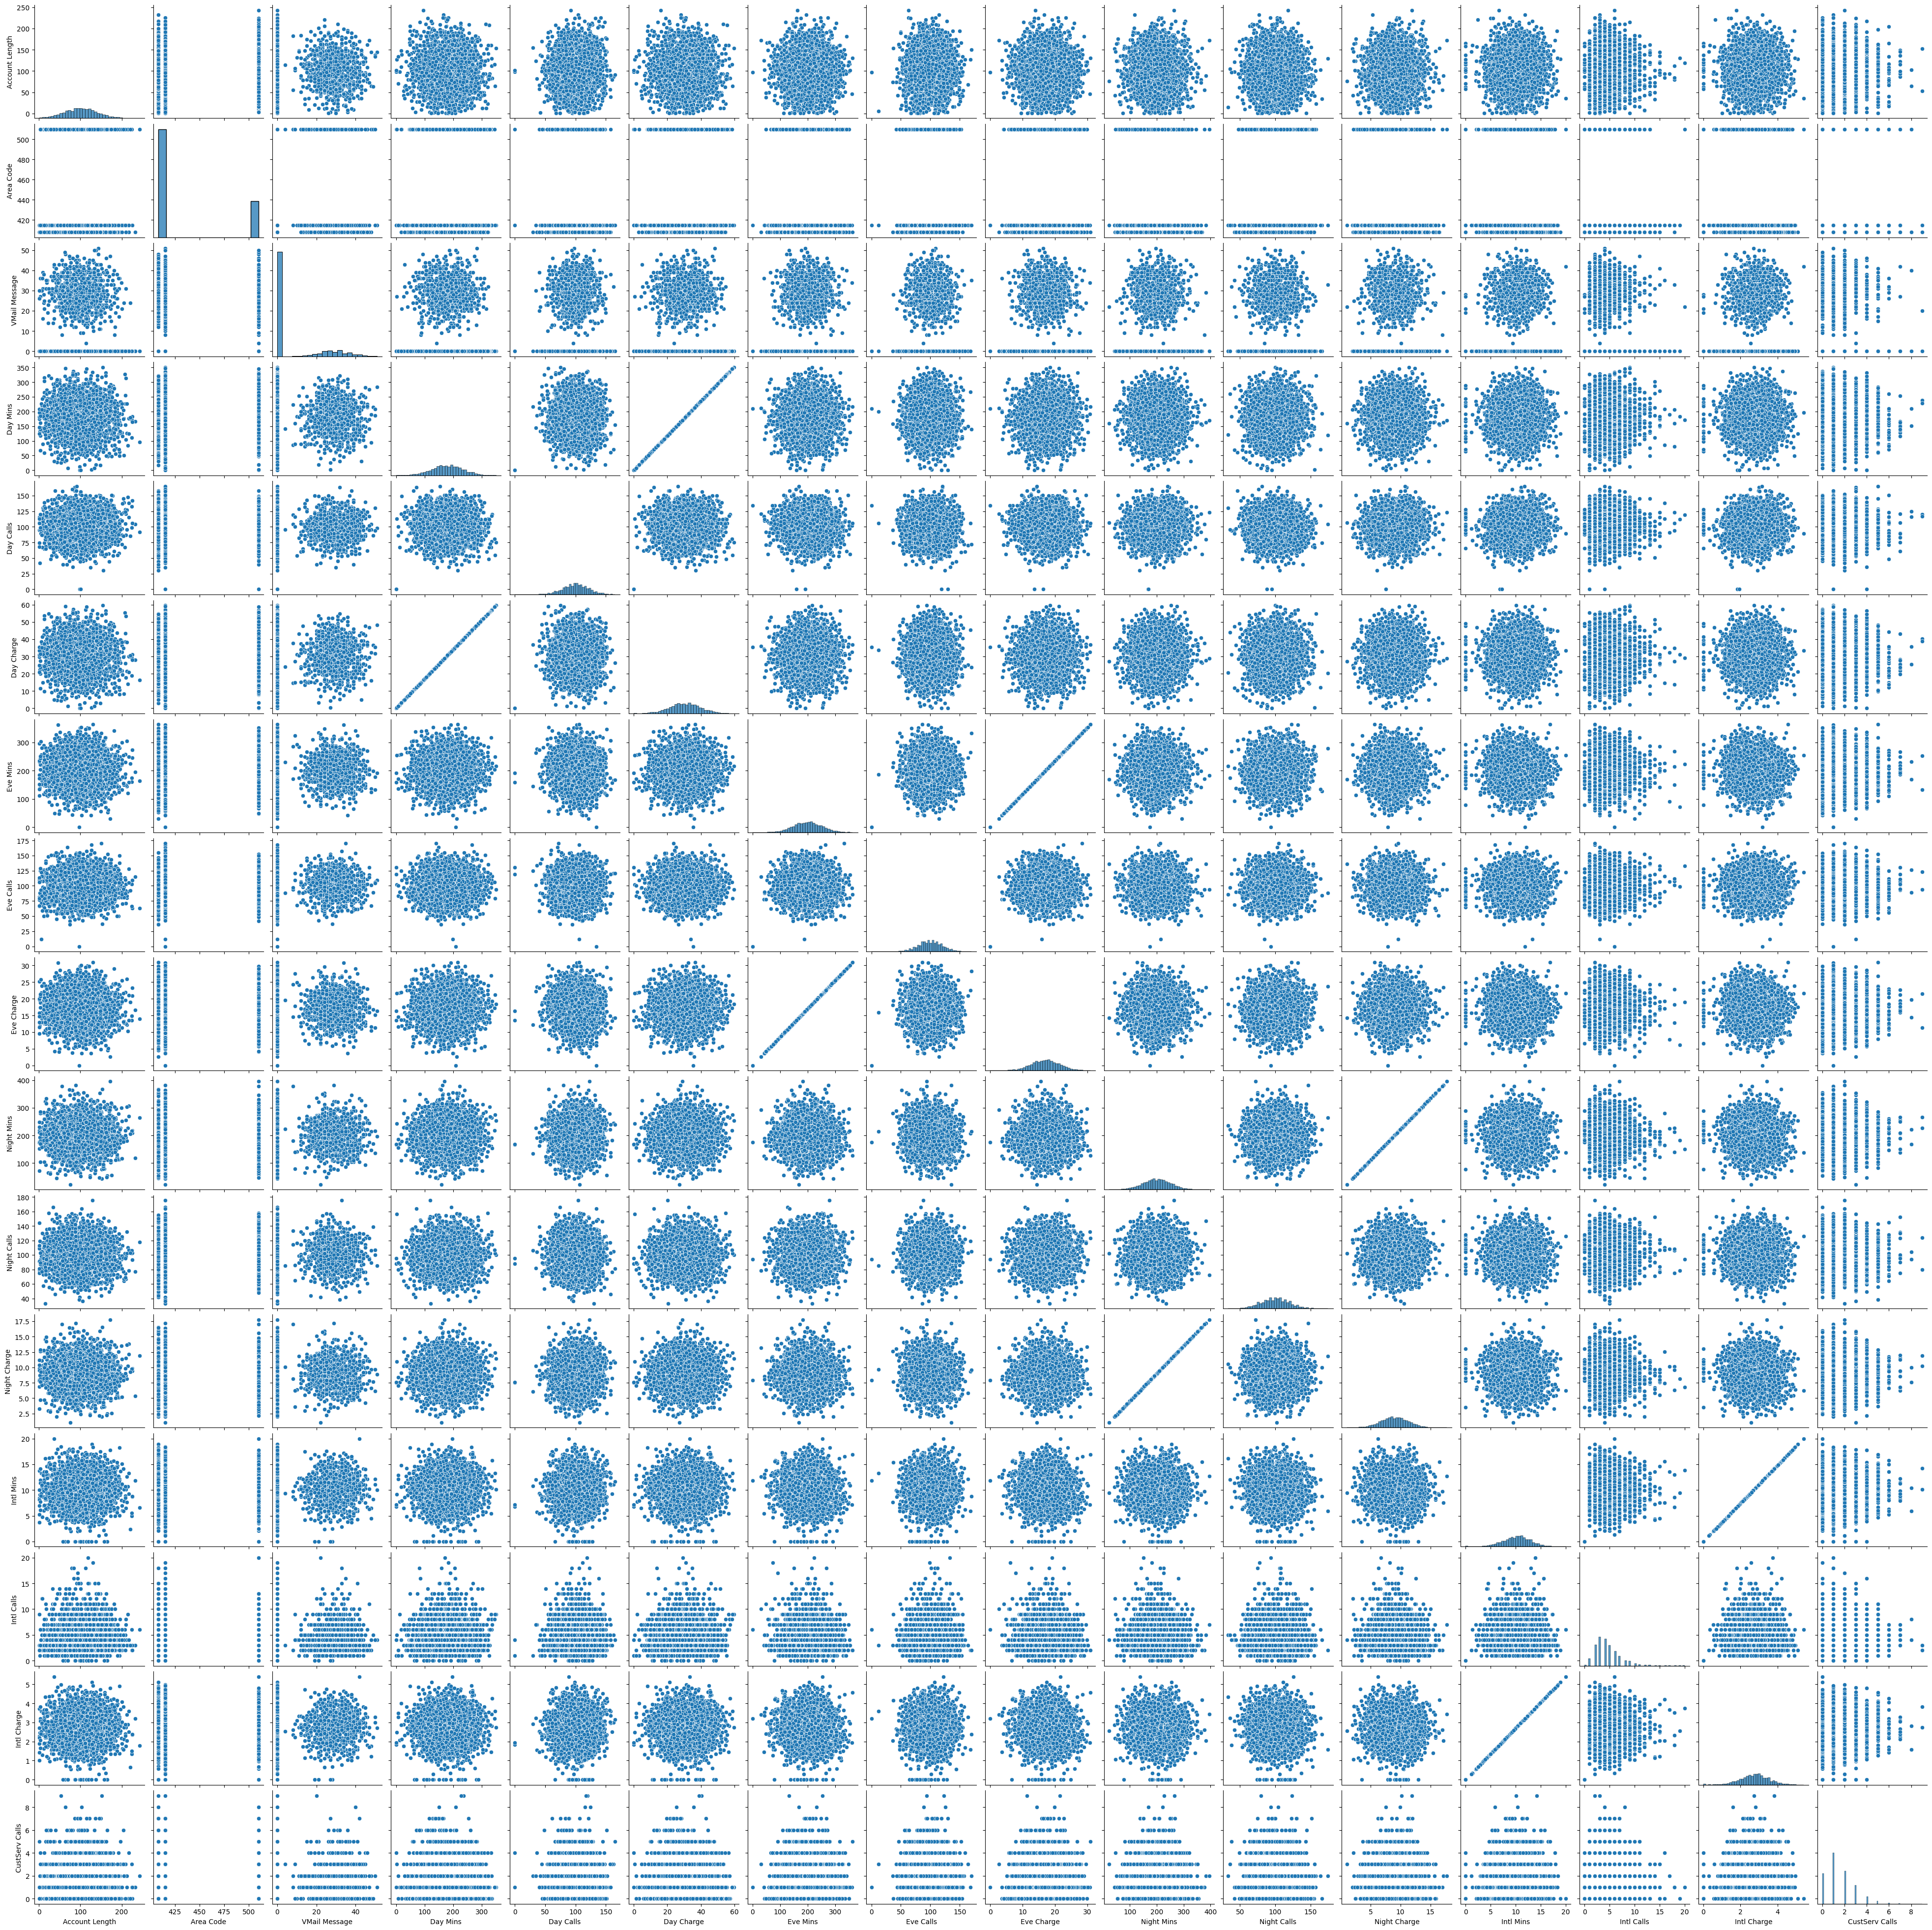

In [5]:
sns.pairplot(data)

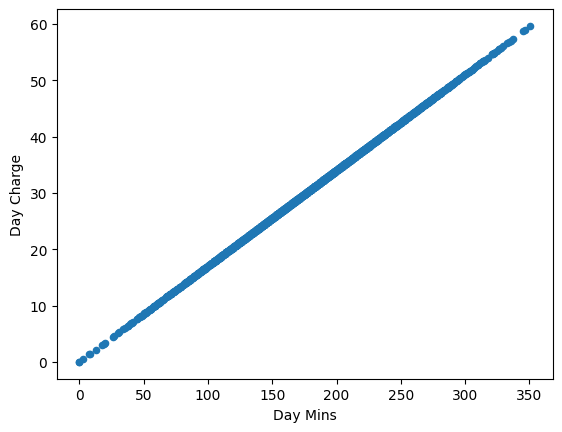

In [6]:
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge')
plt.show()

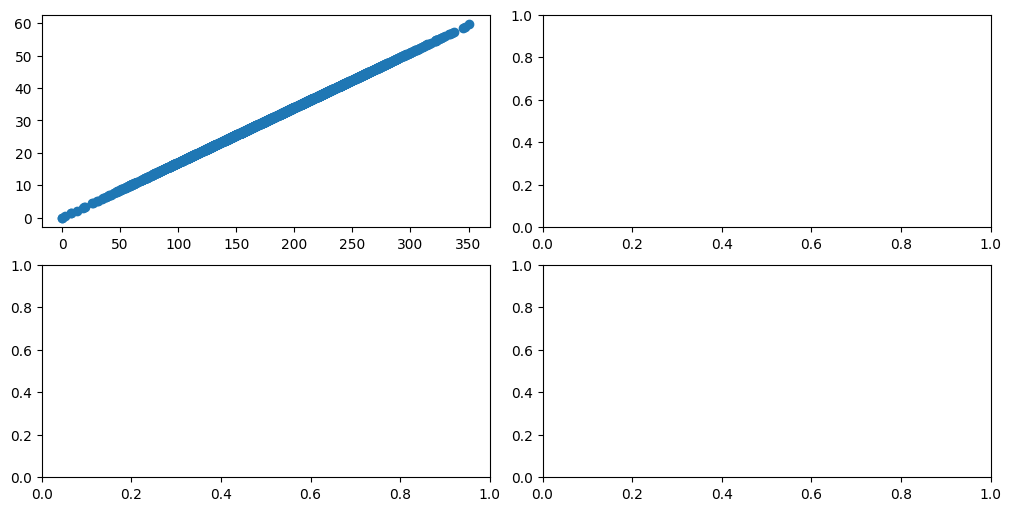

In [7]:
fig, axs = plt.subplots(2,2, figsize=(10, 5), layout="constrained")
axs[0,0].scatter(x = data['Day Mins'], y = data['Day Charge'])
plt.show()

In [8]:
plt.hist(data['Day Calls'], bins = 500)
plt.show()

## Regla de Sturges ##
Permite descifrar un número de beams adecuado para los datos analizados.

In [9]:
k = int(1 + np.log2(len(data['Day Calls'])))

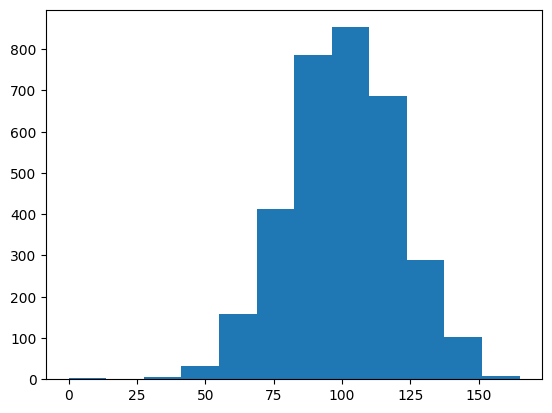

In [10]:
plt.hist(data['Day Calls'], bins = k)
plt.show()

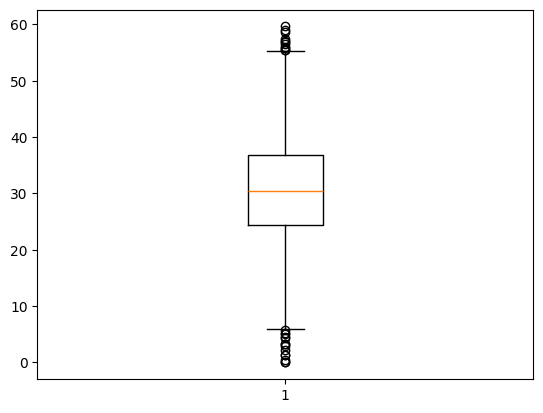

In [11]:
plt.boxplot(data['Day Charge'])
plt.show()

In [12]:
data1 = data['Day Calls']

In [13]:
data1.head()

0    110
1    123
2    114
3     71
4    113
Name: Day Calls, dtype: int64

In [14]:
data1 = data[['Day Calls', 'Day Mins']]
data1.head()

Day Calls  Day Mins
0        110     265.1
1        123     161.6
2        114     243.4
3         71     299.4
4        113     166.7

In [15]:
data2 = data[data['Day Calls'] > 100]
data.shape

(3333, 21)

In [16]:
data3 = data[(data['Day Calls'] > 100) & (data['State'] == 'LA')]
data3.shape
data3.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
32     LA             172        408  383-1121         no         no   
148    LA             121        408  390-8760         no         no   
155    LA             151        408  401-3926         no         no   
623    LA             172        415  392-8905         no         no   
675    LA              43        415  330-2849         no         no   

     VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
32               0     212.0        121       36.04  ...        115   
148              0     181.5        121       30.86  ...         98   
155              0     178.7        116       30.38  ...        138   
623              0     215.7        140       36.67  ...         84   
675              0     241.9        101       41.12  ...        121   

     Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
32         2.65       293.3           78         13.20       12.6          10   
148       18.56       161.6          103          7.27        8.5           5   
155       24.83       265.9          101         11.97        9.8           4   
623       12.44       264.6           83         11.91        7.1           1   
675       11.00       264.8          104         11.92        5.9           3   

     Intl Charge  CustServ Calls  Churn?  
32          3.40               3  False.  
148         2.30               1  False.  
155         2.65               0  False.  
623         1.92               3  False.  
675         1.59               1  False.  

[5 rows x 21 columns]

In [17]:
data3[data3['Area Code'] == 415]

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
623     LA             172        415  392-8905         no         no   
675     LA              43        415  330-2849         no         no   
778     LA             115        415  386-6306         no        yes   
1140    LA               9        415  409-9885         no        yes   
1351    LA              13        415  388-9653         no         no   
1446    LA             111        415  367-2227         no        yes   
1496    LA              81        415  392-2722         no        yes   
1948    LA             128        415  333-9266         no         no   
2055    LA              82        415  353-5557         no         no   
2112    LA             150        415  381-4029         no         no   
2518    LA              53        415  370-8023         no         no   
3178    LA              91        415  382-6153         no         no   

      VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
623               0     215.7        140       36.67  ...         84   
675               0     241.9        101       41.12  ...        121   
778              26     170.5        107       28.99  ...         77   
1140             39     214.1        108       36.40  ...        115   
1351              0      58.4        121        9.93  ...         64   
1446             28     128.8        104       21.90  ...         52   
1496             36     115.9        120       19.70  ...         95   
1948              0     148.5        105       25.25  ...        106   
2055              0     197.7        101       33.61  ...         83   
2112              0     136.6        112       23.22  ...         81   
2518              0     145.1        116       24.67  ...         82   
3178              0     190.5        128       32.39  ...        103   

      Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
623        12.44       264.6           83         11.91        7.1   
675        11.00       264.8          104         11.92        5.9   
778        18.46       225.7           71         10.16       13.6   
1140       14.38       189.7          117          8.54       10.1   
1351       22.29       159.0          115          7.15       11.9   
1446       13.37       147.4           76          6.63       10.3   
1496       20.11       255.0           90         11.48       11.7   
1948       20.66       255.2          114         11.48        6.8   
2055       10.85       142.1          103          6.39       13.5   
2112       17.80       161.1           78          7.25       12.2   
2518       19.86       208.7           95          9.39        7.9   
3178       17.47       130.7           63          5.88       13.8   

      Intl Calls  Intl Charge  CustServ Calls  Churn?  
623            1         1.92               3  False.  
675            3         1.59               1  False.  
778            5         3.67               6  False.  
1140           3         2.73               1  False.  
1351           5         3.21               1  False.  
1446           2         2.78               2  False.  
1496           6         3.16               3  False.  
1948           2         1.84               1  False.  
2055           3         3.65               1  False.  
2112           2         3.29               4   True.  
2518           5         2.13               2  False.  
3178           5         3.73               0  False.  

[12 rows x 21 columns]